# Written by jonathan kjellen


In [ ]:
# The following file paths need to contain the correct files for this notebook to run:
file_path_debates = '../data/data 2018-09-09 2022-09-11/data_debates_2018-09-09_to_2022-09-11.txt'

In [2]:
import matplotlib.pyplot as plt
import json
import requests
import re
import pandas as pd
import numpy as np

In [3]:

with open(file_path_debates, 'r') as openfile:
    # Reading from json file
    json_object = json.load(openfile)
df = pd.DataFrame(json_object)
df = df.drop_duplicates(subset='id_')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1874 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id_                     1874 non-null   object
 1   question                1874 non-null   object
 2   question_date           1874 non-null   object
 3   answer                  1874 non-null   object
 4   undertecknare_name      1874 non-null   object
 5   undertecknare_partibet  1874 non-null   object
 6   besvaradav_name         1874 non-null   object
 7   besvaradav_partibet     1874 non-null   object
 8   debattdag               1874 non-null   object
 9   ip_id                   1874 non-null   object
dtypes: object(10)
memory usage: 161.0+ KB


In [5]:
df.iloc[1]["answer"]

[{'answer': 'Anf.\xa0\xa061\xa0\xa0Statsrådet ANNA-CAREN SÄTHERBERG\xa0(S):Fru talman! Jens Holm har frågat klimat- och miljöministern om ministern avser att vidta omedelbara åtgärder för att minska skogens sårbarhet för klimat och biologisk mångfald, om ministern avser att vidta åtgärder för att långsiktigt säkra skydd för de kvarvarande gamla naturskogarna på grund av deras höga biologiska värden och stora kollager, om ministern avser att verka för skogsbruksmetoder baserade på den bästa vetenskapliga kunskapen samt om ministern avser att vidta ytterligare åtgärder för att stärka skogens alla värden, inklusive lokal och global klimatnytta, rening av luft och vatten, turism och rekreation.Arbetet inom regeringen är så fördelat att de frågor som tas upp i interpellationen huvudsakligen faller inom mitt ansvarsområde, och interpella\xadtionen besvaras därför av mig.Klimatförändringarna kan komma att innebära fler konsekvenser för skogsbruket. Det är därför viktigt att skogsskötseln plan

In [6]:
mean_answer_length = df['answer'].str.len().mean()
min_answer_length = df['answer'].str.len().min()
max_answer_length = df['answer'].str.len().max()
one_answer_length = (df['answer'].str.len() == 1).sum()
count_min_answer = (df['answer'].str.len() == min_answer_length).sum()
count_amount_no_debattdag = (df["debattdag"].str.len() == 0).sum()

In [7]:
print("mean answer length:",mean_answer_length)
print("smallest answer length:", min_answer_length)
print("largest answer length:",max_answer_length)
print("amont of debates with the smallest answer length:",count_min_answer)
print("amount of questions with no debattdag",count_amount_no_debattdag)
print("amount of questions with one answer",one_answer_length)

mean answer length: 6.2235859124866595
smallest answer length: 0
largest answer length: 21
amont of debates with the smallest answer length: 393
amount of questions with no debattdag 344
amount of questions with one answer 5


In [8]:
df.loc[(df["answer"].str.len() == 0) & (df["debattdag"].str.len() != 0)].head(5)

,id_,question,question_date,answer,undertecknare_name,undertecknare_partibet,besvaradav_name,besvaradav_partibet,debattdag,ip_id
210,h910372,av Carl-Oskar Bohlin (M)\ntill Statsrådet Khas...,2022-02-24,[],Carl-Oskar Bohlin,M,Statsrådet Khashayar Farmanbar,S,2022-03-15,2021/22:372
215,h910368,av Sofia Nilsson (C)\ntill Socialminister Lena...,2022-02-22,[],Sofia Nilsson,C,Socialminister Lena Hallengren,S,2022-03-04,2021/22:368
357,h91075,av Mikael Eskilandersson (SD)\ntill Justitie- ...,2021-11-11,[],Mikael Eskilandersson,SD,Statsrådet Märta Stenevi,MP,2021-11-09,2021/22:75
421,h910518,av Tobias Andersson (SD)\ntill Kulturminister ...,2022-05-25,[],Tobias Andersson,SD,Kulturminister Jeanette Gustafsdotter,S,2022-06-10,2021/22:518
479,h910116,av Lars Hjälmered (M)\ntill Klimat- och miljöm...,2021-12-14,[],Lars Hjälmered,M,Klimat- och miljöminister Annika Strandhäll,S,2021-12-10,2021/22:116


In [15]:
df.head()

,id_,question,question_date,answer,undertecknare_name,undertecknare_partibet,besvaradav_name,besvaradav_partibet,debattdag,ip_id
0,h910261,av Jörgen Berglund (M)\ntill Klimat- och miljö...,2022-01-12,[],Jörgen Berglund,M,Klimat- och miljöminister Annika Strandhäll,S,,2021/22:261
1,h910260,av Jens Holm (V)\ntill Klimat- och miljöminist...,2022-01-12,[{'answer': 'Anf. 61 Statsrådet ANNA-CAREN S...,Jens Holm,V,Statsrådet Anna-Caren Sätherberg,S,2022-02-01,2021/22:260
2,h91026,av Thomas Morell (SD)\ntill Finansminister Mag...,2021-09-30,[{'answer': 'Anf. 8 Finansminister MAGDALENA...,Thomas Morell,SD,Finansminister Magdalena Andersson,S,2021-10-22,2021/22:26
3,h910259,av Mikael Larsson (C)\ntill Infrastrukturminis...,2022-01-12,[{'answer': 'Anf. 88 Infrastrukturminister T...,Mikael Larsson,C,Infrastrukturminister Tomas Eneroth,S,2022-01-25,2021/22:259
4,h910258,av Lars Beckman (M)\ntill Näringsminister Karl...,2022-01-12,[],Lars Beckman,M,Näringsminister Karl-Petter Thorwaldsson,S,,2021/22:258


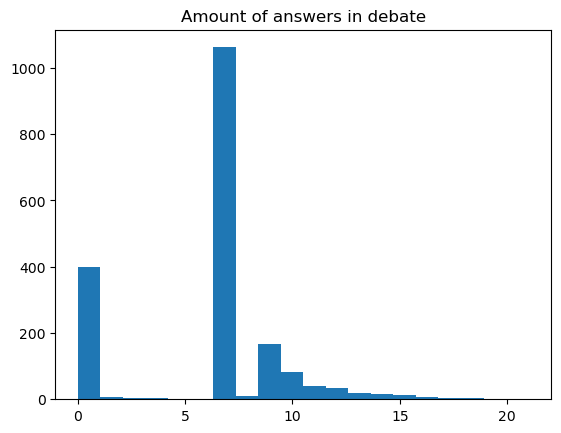

In [9]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist(df["answer"].str.len(), bins=20)
plt.title("Amount of answers in debate")
plt.show() 

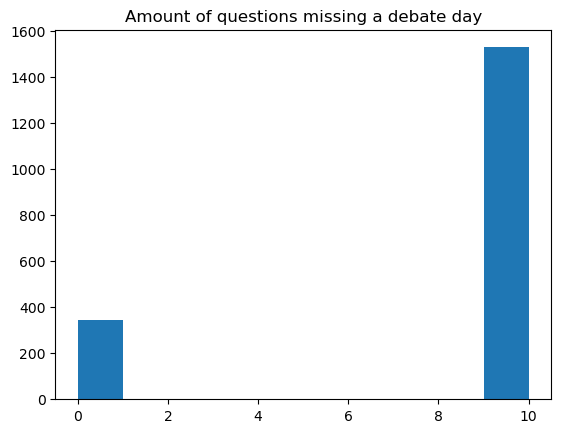

In [10]:
import matplotlib.pyplot as plt
import numpy as np
plt.hist(df["debattdag"].str.len())
plt.title("Amount of questions missing a debate day")
plt.show() 

([<matplotlib.axis.XTick at 0x1ef426c9b50>,
 [Text(0, 0, '-'),
  Text(1, 0, 'C'),
  Text(2, 0, 'KD'),
  Text(3, 0, 'L'),
  Text(4, 0, 'M'),
  Text(5, 0, 'MP'),
  Text(6, 0, 'S'),
  Text(7, 0, 'SD'),
  Text(8, 0, 'V')])

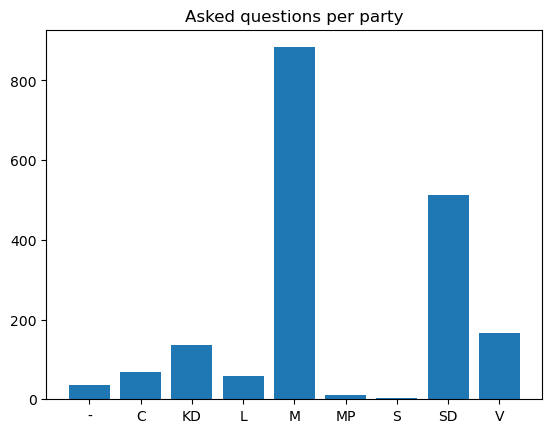

In [11]:
import numpy as np
a = df["undertecknare_partibet"]
labels, counts = np.unique(a,return_counts=True)
import matplotlib.pyplot as plt 
ticks = range(len(counts))
plt.title("Asked questions per party")
plt.bar(ticks,counts, align='center')
plt.xticks(ticks, labels)

([<matplotlib.axis.XTick at 0x1ef42754790>,
 [Text(0, 0, 'MP'), Text(1, 0, 'S')])

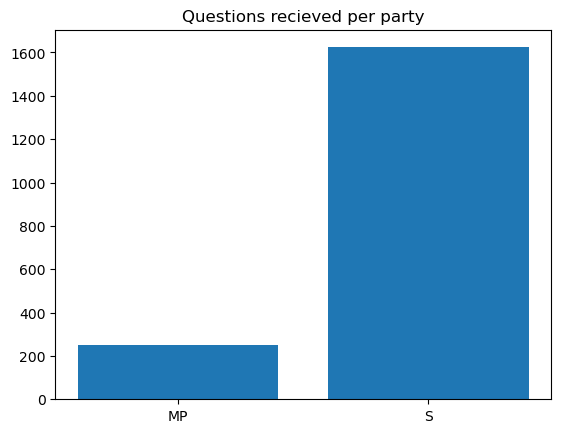

In [12]:

a = df["besvaradav_partibet"]
labels, counts = np.unique(a,return_counts=True)
ticks = range(len(counts))
plt.title("Questions recieved per party")
plt.bar(ticks,counts, align='center')
plt.xticks(ticks, labels)

In [13]:

a = df["answer"]

answered = {}

for i in range(len(df)):
    b = a.iloc[i]
    if len(b) > 0:
        for j in range(len(b)):
            label = b[j]["besvaradav_partibet"]
            if label == "LDERSPRESIDENTE":
                print(b[j])
            if label not in answered:
                answered[label] = 1
            else:
                answered[label] += 1
                


([<matplotlib.axis.XTick at 0x1ef42983250>,
 [Text(0, 0, 'S'),
  Text(1, 0, 'V'),
  Text(2, 0, 'SD'),
  Text(3, 0, 'C'),
  Text(4, 0, 'KD'),
  Text(5, 0, 'M'),
  Text(6, 0, 'MP'),
  Text(7, 0, 'L'),
  Text(8, 0, '-')])

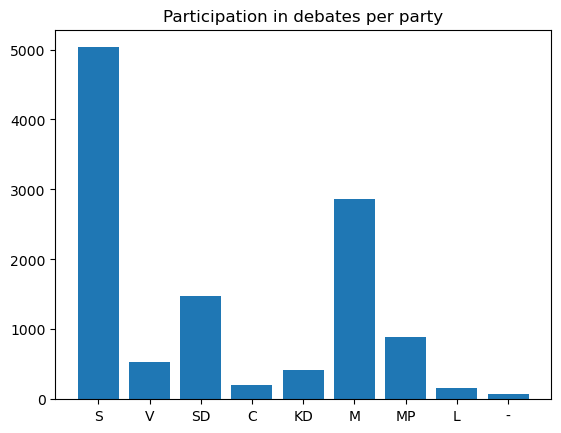

In [14]:
list_items = [t[1] for t in list(answered.items())]
list_keys = list(answered.keys())
ticks = range(len(answered))
plt.title("Participation in debates per party")
plt.bar(ticks,list_items, align='center')
plt.xticks(ticks, list_keys)